In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.special import lambertw

In [2]:
from simulatedAnnealing import mutate

${initial\_temp} \cdot {cooling}^{n} \leq {freezing\_temp}$

${cooling}^{n} \leq \frac{freezing\_temp}{initial\_temp}$

${n} \cdot ln(cooling) \leq ln(\frac{freezing\_temp}{initial\_temp})$

${n} \geq ln(\frac{freezing\_temp}{initial\_temp})\;/\;ln({cooling})$

${n} = \lceil{ln(\frac{freezing\_temp}{initial\_temp})\;/\;ln({cooling})\rceil} $

In [3]:
freezing_temp = 0.1
initial_temp = 2500
cooling = 0.99
n = int(np.ceil(np.log(freezing_temp/initial_temp) / np.log(cooling)))

In [4]:
cooling_powers = np.array([cooling**i for i in range(n)])
mutation_rates = np.array([[cooling**i * n_items for n_items in range(16,25)] for i in range(n)])

In [5]:
re = mutation_rates

In [6]:
from pandas import DataFrame
df = DataFrame(data=mutation_rates, columns=range(16,25))
df.head()

,16,17,18,19,20,21,22,23,24
0,16.000000,17.000000,18.000000,19.000000,20.00000,21.000000,22.000000,23.000000,24.000000
1,15.840000,16.830000,17.820000,18.810000,19.80000,20.790000,21.780000,22.770000,23.760000
2,15.681600,16.661700,17.641800,18.621900,19.60200,20.582100,21.562200,22.542300,23.522400
3,15.524784,16.495083,17.465382,18.435681,19.40598,20.376279,21.346578,22.316877,23.287176
4,15.369536,16.330132,17.290728,18.251324,19.21192,20.172516,21.133112,22.093708,23.054304


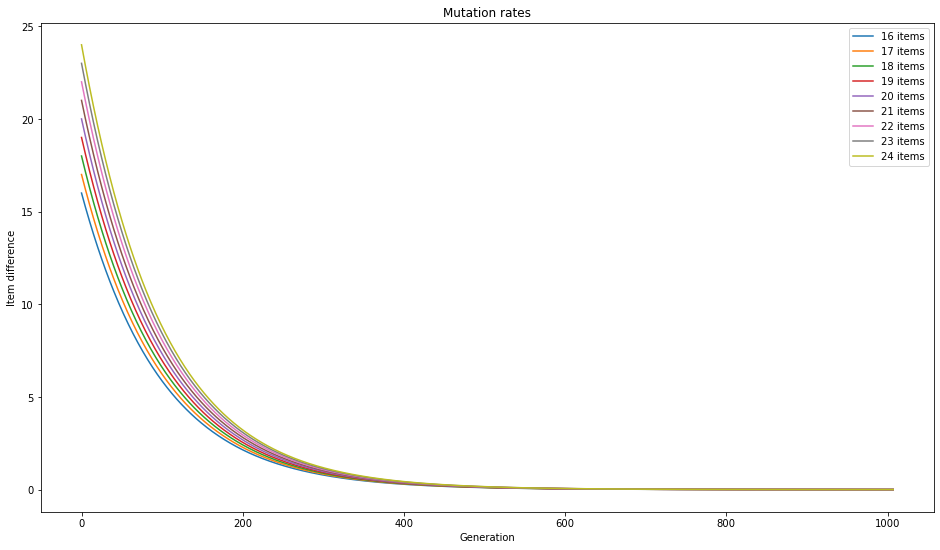

In [7]:
fig, axs = plt.subplots(1)
axs.set_title("Mutation rates")
axs.set(xlabel="Generation", ylabel="Item difference")
df.plot(figsize=(16, 9), ax=axs)
axs.legend([str(i)+" items" for i in range(16,25)])

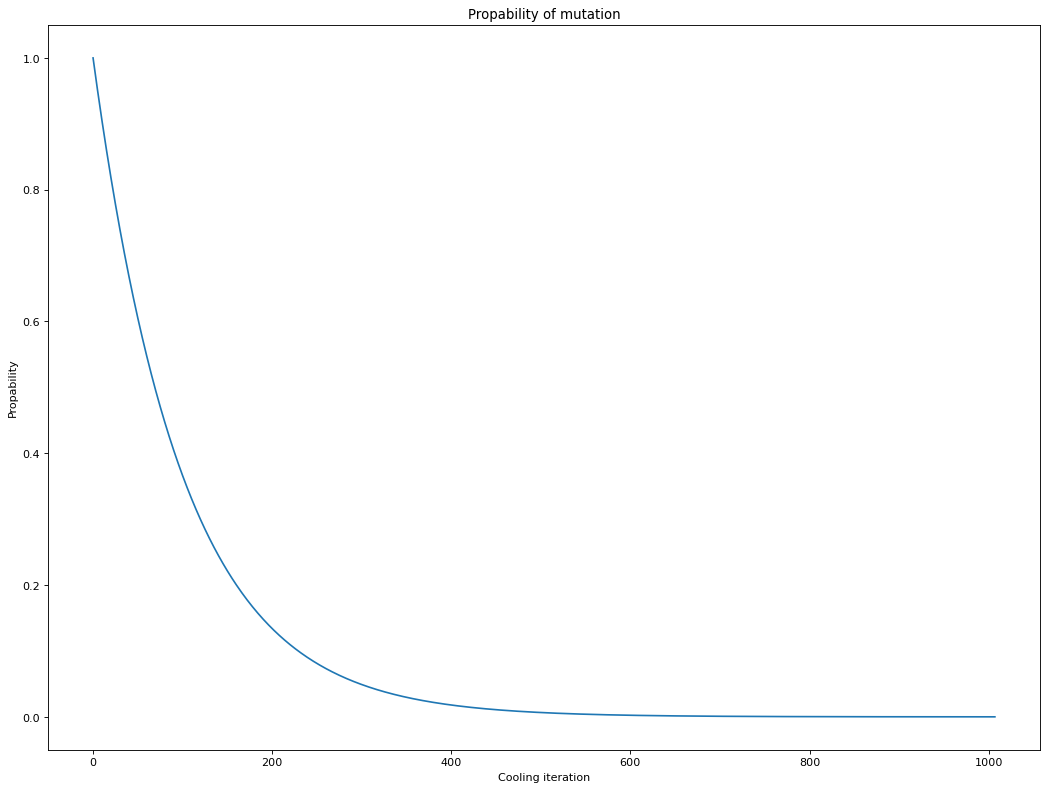

In [8]:
plt.figure(figsize=(16, 12), dpi=80)
plt.plot(cooling_powers)

plt.title('Propability of mutation')
plt.ylabel('Propability')
plt.xlabel('Cooling iteration')
plt.show()

In [9]:
all_std = np.array([[np.sqrt(cooling_power * n_items * (1 - cooling_power))  for n_items in range(16,25)] for cooling_power in cooling_powers])

In [10]:
all_std

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39799497, 0.41024383, 0.42213742, ..., 0.46669048, 0.47717921,
        0.4874423 ],
       [0.55862674, 0.57581927, 0.59251314, ..., 0.65504792, 0.66976994,
        0.68417524],
       ...,
       [0.02562928, 0.02641805, 0.02718395, ..., 0.03005299, 0.03072842,
        0.03138933],
       [0.02550081, 0.02628564, 0.0270477 , ..., 0.02990236, 0.0305744 ,
        0.03123199],
       [0.02537299, 0.02615388, 0.02691213, ..., 0.02975247, 0.03042115,
        0.03107545]])

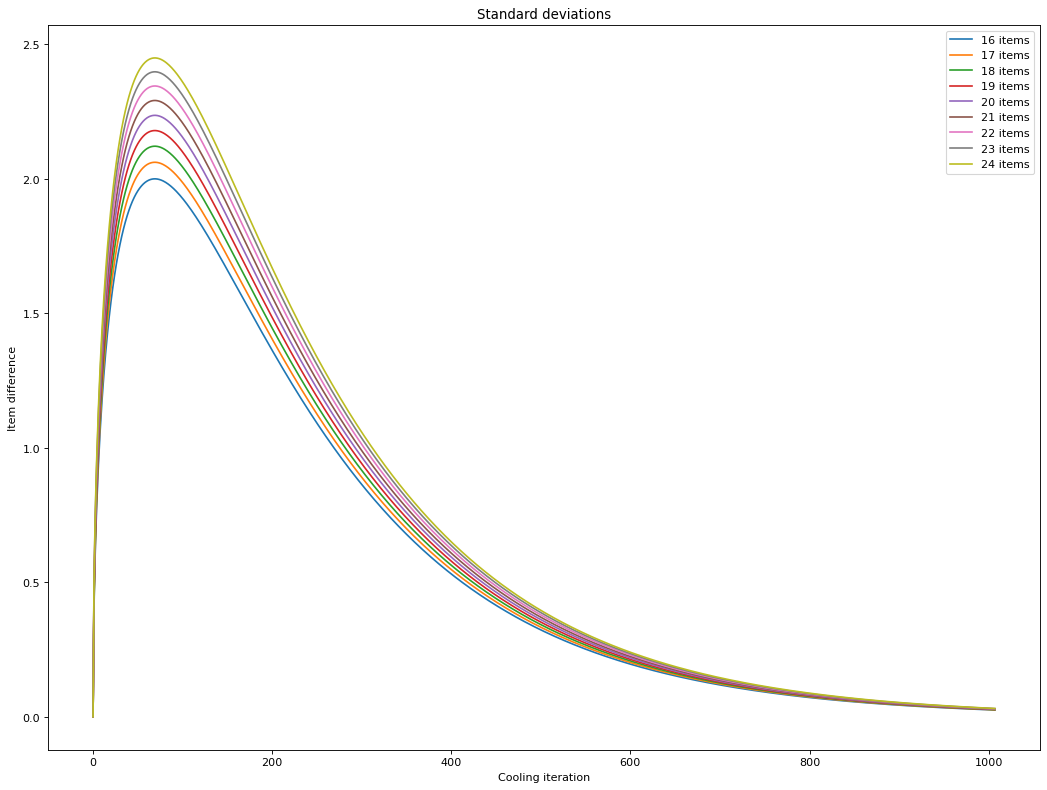

In [11]:
plt.figure(figsize=(16, 12), dpi=80)
plt.plot(all_std)

plt.title('Standard deviations')
plt.ylabel('Item difference')
plt.xlabel('Cooling iteration')
plt.legend([str(i)+" items" for i in range(16,25)])
plt.show()

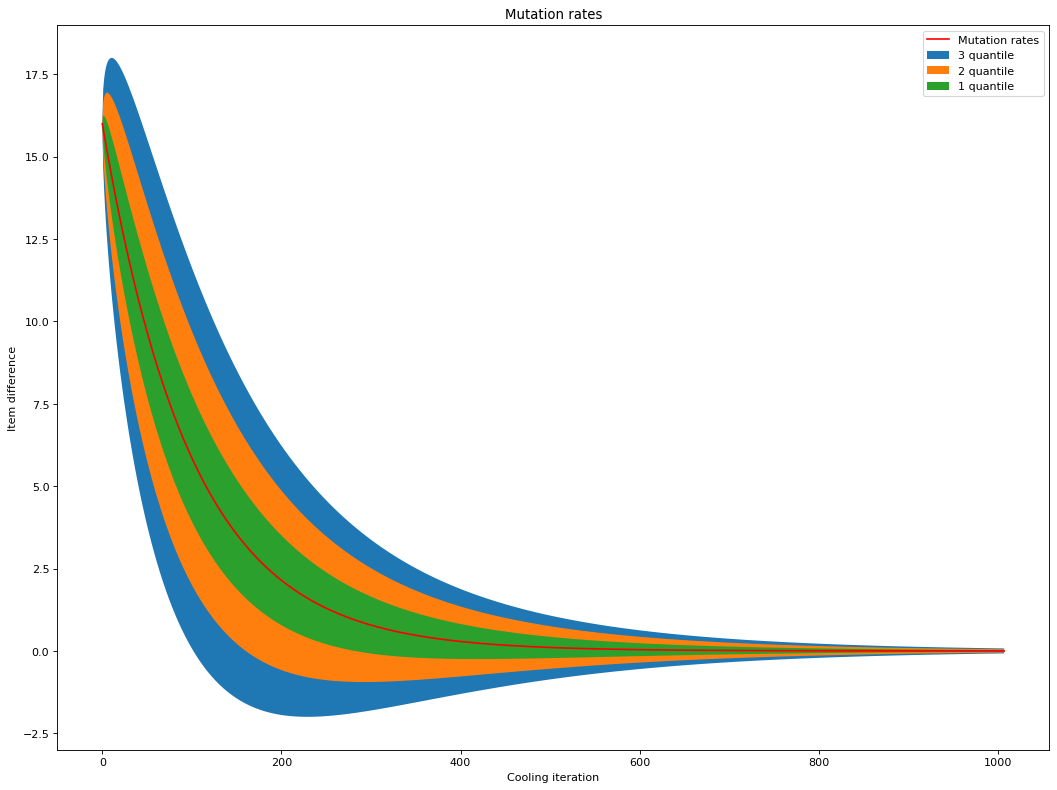

In [12]:
plt.figure(figsize=(16, 12), dpi=80)
plt.plot(mutation_rates[:,0], c='r')

plt.fill_between(range(n), mutation_rates[:,0] - all_std[:,0] * 3, mutation_rates[:,0] + all_std[:,0] * 3)

plt.fill_between(range(n), mutation_rates[:,0] - all_std[:,0] * 2, mutation_rates[:,0] + all_std[:,0] * 2)

plt.fill_between(range(n), mutation_rates[:,0] - all_std[:,0], mutation_rates[:,0] + all_std[:,0])

plt.title('Mutation rates')
plt.ylabel('Item difference')
plt.xlabel('Cooling iteration')
plt.legend(["Mutation rates", "3 quantile", "2 quantile", "1 quantile"])
plt.show()

In [13]:
from pandas import read_csv
max_weight = 3
min_weight = max_weight - 1
data_nc16 = read_csv("Data//no_correlation_16")
n_items = data_nc16.shape[0]
values = data_nc16.value.values
weights = data_nc16.weight.values

In [14]:
n_elements = 100
individuals = np.random.rand(n_elements,n_items) > 0.5

In [15]:
def distance(state1, state2):
    return np.sum(state1 ^ state2)
    

In [16]:
distances = np.zeros((n_elements,2,n))

for i, base_state in enumerate(individuals):
    current_state = np.copy(base_state)
    for j, cooling in enumerate(cooling_powers):
        next_state = mutate(np.copy(current_state),cooling,n_items,weights,min_weight,max_weight)
        distances[i,0,j] = distance(base_state, current_state)
        distances[i,1,j] = distance(current_state, next_state)
        
        current_state = next_state

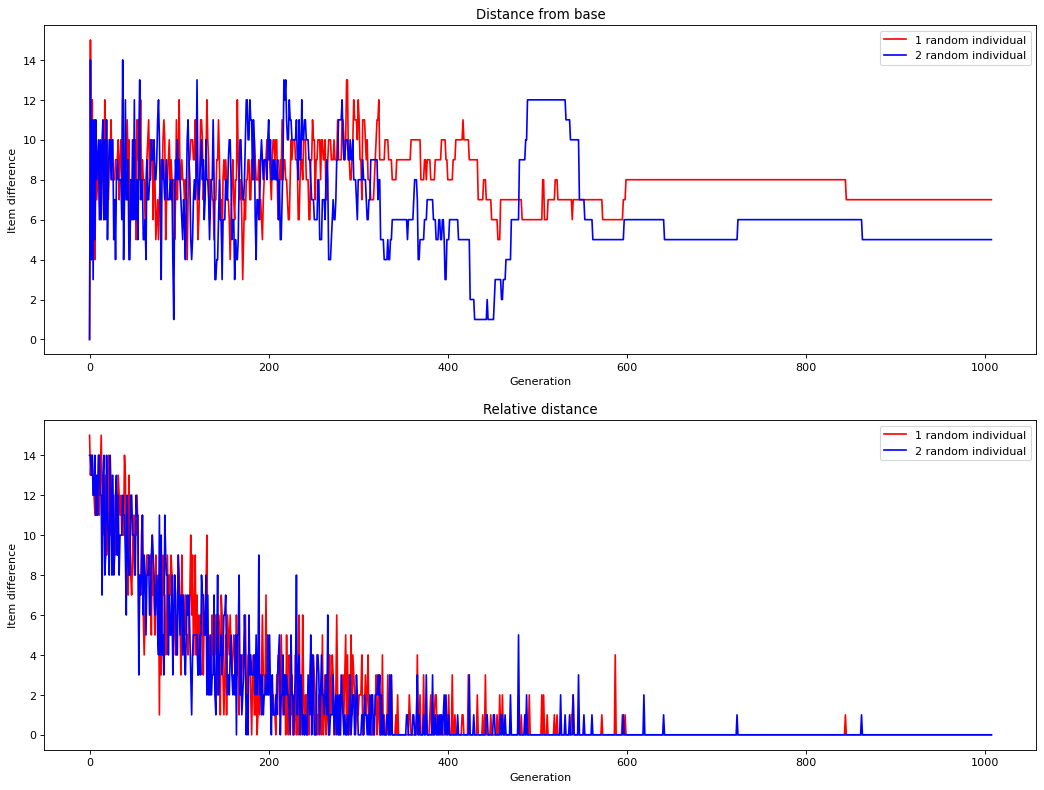

In [17]:
fig, axs = plt.subplots(2,figsize=(16, 12), dpi=80)
axs[0].plot(distances[0,0,:], c='r')
axs[0].plot(distances[1,0,:], c='b')
axs[1].plot(distances[0,1,:], c='r')
axs[1].plot(distances[1,1,:], c='b')

axs[0].set_title("Distance from base")
axs[0].set(xlabel="Generation", ylabel="Item difference")
axs[0].legend(["1 random individual", "2 random individual"])
axs[1].set_title("Relative distance")
axs[1].set(xlabel="Generation", ylabel="Item difference")
axs[1].legend(["1 random individual", "2 random individual"])

plt.show()

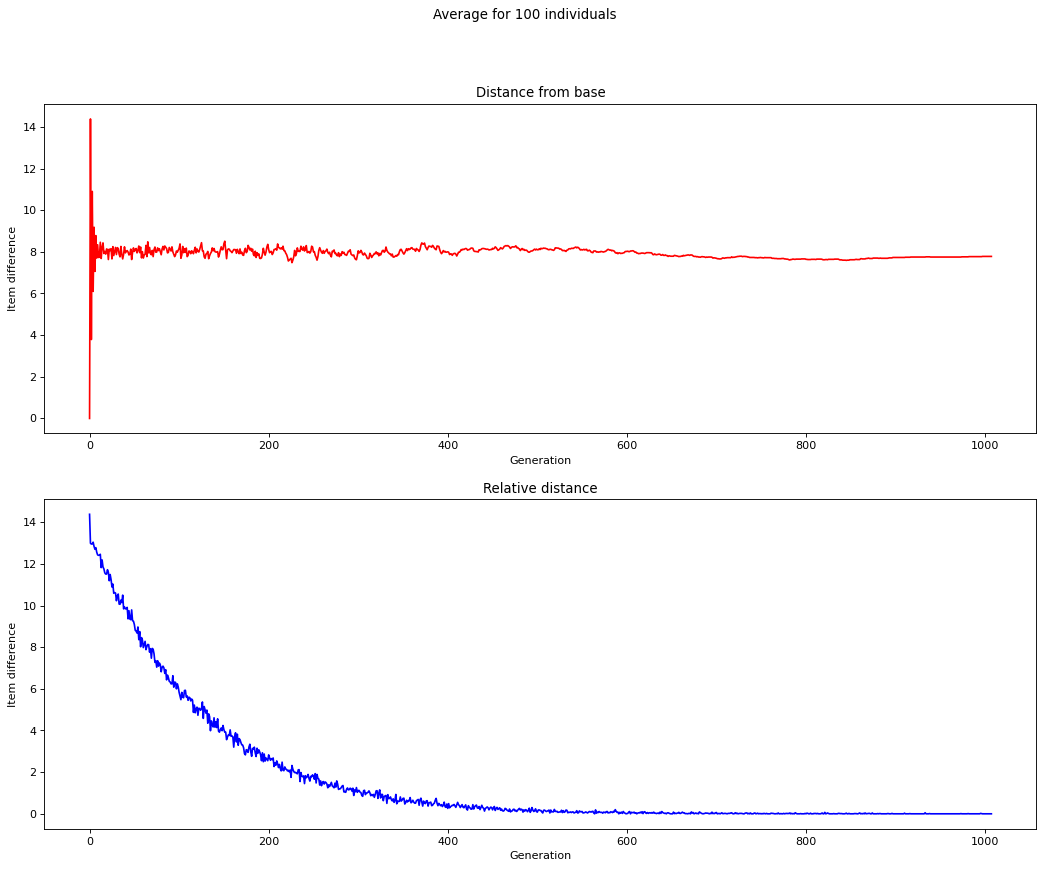

In [18]:
fig, axs = plt.subplots(2,figsize=(16, 12), dpi=80)
axs[0].plot(np.average(distances[:,0,:], axis=0), c='r')
axs[1].plot(np.average(distances[:,1,:], axis=0), c='b')

axs[0].set_title("Distance from base")
axs[0].set(xlabel="Generation", ylabel="Item difference")
axs[1].set_title("Relative distance")
axs[1].set(xlabel="Generation", ylabel="Item difference")
fig.suptitle(f"Average for {n_elements} individuals")

plt.show()